# Probability Distributions

In [1]:
import numpy as np
import scipy.stats.distributions as D
import matplotlib.pyplot as plt

# plt.xkcd()

In [2]:
class Distribution():
    """Base class for distributions."""
    
    def pdf(self, x):
        """Computes the probability density function."""
        pass

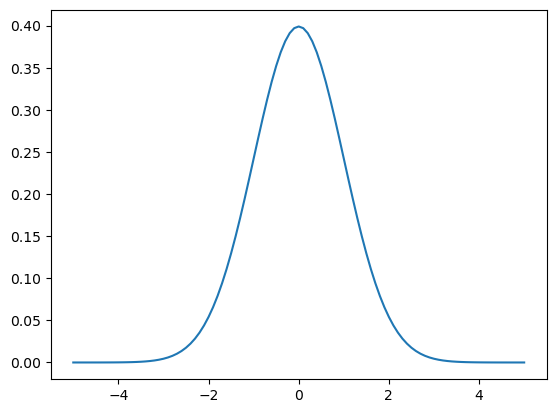

In [3]:
class Normal(Distribution):
    """Univariate Normal Distribution."""
    
    def __init__(self, loc=0, scale=1):
        super().__init__()
        self.loc = loc
        self.scale = scale

    def pdf(self, x):
        t = self.scale * np.sqrt(2 * np.pi)
        p = np.power(x - self.loc, 2)
        q = -2 * np.power(self.scale, 2)
        return (1.0 / t) * np.exp(p / q)
        
x = np.linspace(-5, 5, 101)
normal = Normal(0,1)
y = normal.pdf(x)

plt.plot(x, y)

In [124]:
from scipy.special import factorial

class Beta(Distribution):
    """Beta distribution."""

    def __init__(self, alpha=1, beta=1):
        super().__init__()
        self.alpha = alpha
        self.beta = beta
        self.eps = 1e-8

    def pdf(self, x):
        # clip to bounds to avoid divide by zero error
        x = np.clip(x, self.eps, 1 - self.eps)
        b = self.beta_func_num(self.alpha, self.beta)
        p = np.power(x, self.alpha - 1)
        q = np.power(1 - x, self.beta - 1)
        return (1 / b) * p * q
    
    def gamma_func_rec(self, x):
        """Recursive implementation of the gamma function."""
        if x == 1:
            return x
        return (x - 1) * gamma(x - 1)
    
    def gamma_func_scipy(self, x):
        #if isinstance(x, int):
        # x = np.array([x])
        #y = [np.prod(np.arange(1, z + 1)) for z in x]
        # return np.array(y)
        return factorial(x-1)

    def gamma_func_num(self, x, steps=1000, t_max=500, eps=1e-8):
        delta = t_max / steps
        # add small offset to avoid division by 0 for negative x - 1
        t = np.linspace(0+eps, t_max, steps)
        y = np.power(t, x - 1) * np.exp(-t)
        return np.sum(delta * y)
        
    def beta_func(self, p, q):
        return self.gamma_func_num(p) * self.gamma_func_num(q) / self.gamma_func_num(p+q) 

    def beta_func_num(self, z1, z2, steps=10000, eps=1e-8):
        delta = 1 / steps
        t = np.linspace(0, 1, steps)
        t = np.clip(t, self.eps, 1 - self.eps)
        y = np.power(t, z1 - 1) * np.power(1 - t, z2 - 1)
        return np.sum(delta * y)
        

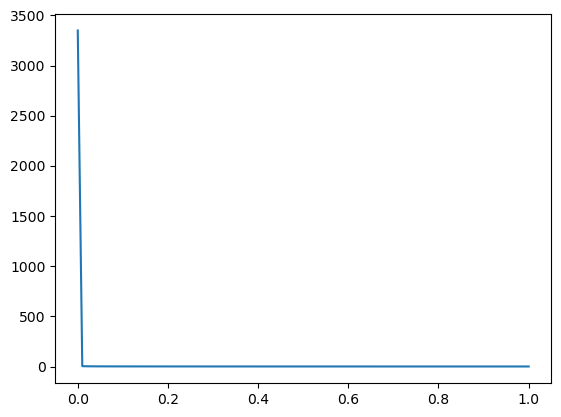

In [128]:
x = np.linspace(0, 1, 101)
beta = Beta(0.5, 1)
y = beta.pdf(x)
plt.plot(x, y)
#plt.plot(x, D.beta(5, 3).pdf(x))

In [16]:
scipy.special.factorial(0.1)

0.9513507698668734

In [105]:
np.minimum([1,2,3], 2)

array([1, 2, 2])